In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [20]:
num_vars = 10
num_constraints = 5
x_min = -10
x_max = 10

max_iter = 5000
tol = 1e-8

A = np.random.randn(num_constraints, num_vars)
b = np.random.randn(num_constraints)

c = np.random.randn(num_vars)

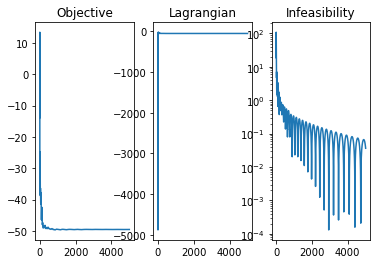

In [21]:
x = np.random.randn(num_vars)
lam = np.random.randn(num_constraints)

obj = []
feas = []
lagrangian = []

t = 1

rho = 0.1

AA_1 = np.linalg.inv(A.T.dot(A))

while len(obj) < max_iter:    
    rate = 1 / np.sqrt(t)
#     rate = 0.0001
        
    # augmented lagrangian gradient
    x_grad = c + lam.dot(A) + rho * A.T.dot(A).dot(x) - b.dot(A)

    # lagrangian gradient
#     x_grad = c + lam.dot(A)

    x -= rate * x_grad
    
    x = x.clip(min=x_min, max=x_max)
    
    obj.append(c.dot(x))
    lagrangian.append(c.dot(x) + lam.dot(A.dot(x) - b))
    feas.append(np.linalg.norm(A.dot(x) - b))
    
    lam_grad = A.dot(x) - b 
    lam += rate * lam_grad

    
    t += 1

plt.subplot(131)
plt.plot(obj)
plt.title('Objective')

plt.subplot(132)
plt.plot(lagrangian)
plt.title('Lagrangian')

plt.subplot(133)
plt.semilogy(feas)
plt.title('Infeasibility')

